In [1]:
%pylab inline
from wallet.util.analysis import Analysis

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
##############################

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
QQQ,21.0,0.412048,0.362729,-0.142598,-0.121818,0.401725,1.077115,1.115570,1.114087,9.492485,3.319081,0.482529
SPY,21.0,0.414380,0.407029,-0.428319,-0.196179,0.567417,0.974381,1.064715,0.998563,9.935274,3.726494,-0.602785


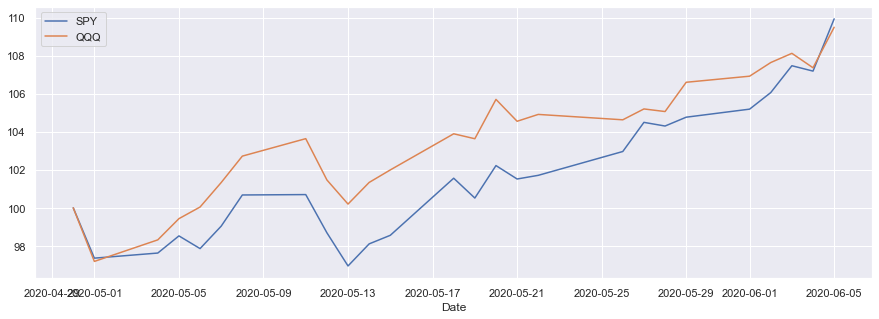

In [2]:
ana = Analysis(['SPY','QQQ'], 21, 5)
ana.graph()

In [3]:
ana.drop_mask()
ana.optimize_iteration([100], max_count=2, sharpe=False, allow_short=True)

([(3.8705, {'SPY': -0.6297, 'QQQ': 1.0})],
 [(0, 0, [[{'SPY': -63, 'QQQ': 100}, set()]])])

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
QQQ,21.0,0.412048,0.362729,-0.142598,-0.121818,0.401725,1.077115,1.115570,1.114087,9.492485,3.319081,0.482529
SPY,21.0,0.414380,0.407029,-0.428319,-0.196179,0.567417,0.974381,1.064715,0.998563,9.935274,3.726494,-0.602785
Portfolio,21.0,0.208859,0.263029,-0.323831,-0.081501,0.164886,0.749482,0.773392,0.763879,4.524848,1.605486,0.541387


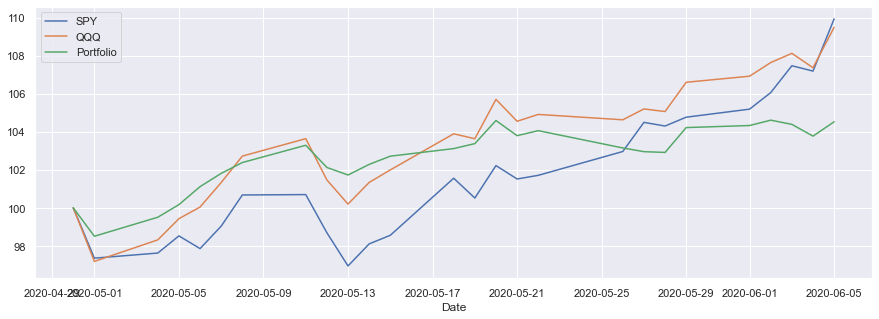

In [4]:
ana.graph({'SPY': -0.5, 'QQQ': 1.0})

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
QQQ,21.0,0.412048,0.362729,-0.142598,-0.121818,0.401725,1.077115,1.115570,1.114087,9.492485,3.319081,0.482529
SPY,21.0,0.414380,0.407029,-0.428319,-0.196179,0.567417,0.974381,1.064715,0.998563,9.935274,3.726494,-0.602785
Portfolio,21.0,0.155312,0.257423,-0.377179,-0.181596,0.142836,0.669256,0.685498,0.572503,3.233262,1.869091,0.327240


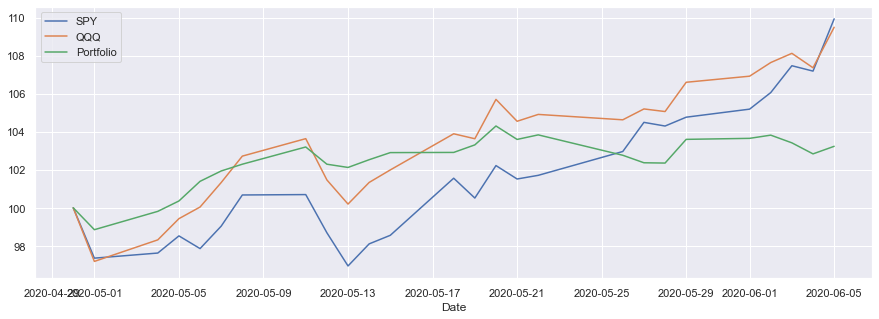

In [5]:
ana.graph({'SPY': -0.63, 'QQQ': 1.0})

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
QQQ,21.0,0.412048,0.362729,-0.142598,-0.121818,0.401725,1.077115,1.115570,1.114087,9.492485,3.319081,0.482529
SPY,21.0,0.414380,0.407029,-0.428319,-0.196179,0.567417,0.974381,1.064715,0.998563,9.935274,3.726494,-0.602785
Portfolio,21.0,0.126352,0.258870,-0.406049,-0.235679,0.147845,0.626165,0.638352,0.457432,2.537793,2.011638,0.199405


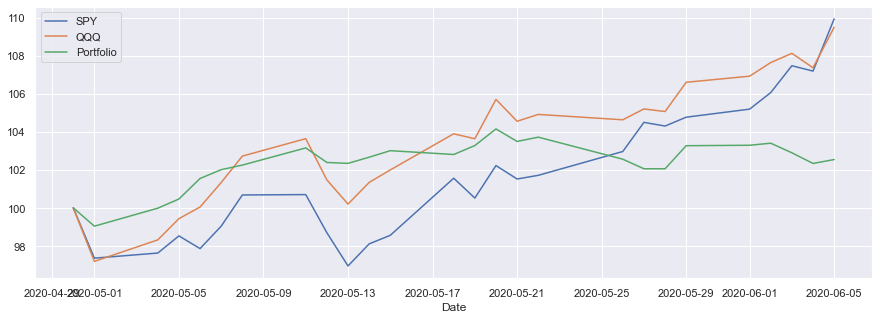

In [6]:
ana.graph({'SPY': -0.7, 'QQQ': 1.0})

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
QQQ,21.0,0.412048,0.362729,-0.142598,-0.121818,0.401725,1.077115,1.115570,1.114087,9.492485,3.319081,0.482529
SPY,21.0,0.414380,0.407029,-0.428319,-0.196179,0.567417,0.974381,1.064715,0.998563,9.935274,3.726494,-0.602785
Portfolio,21.0,0.084823,0.266309,-0.447468,-0.313167,0.104045,0.564737,0.571218,0.288713,1.544265,2.290449,0.042783


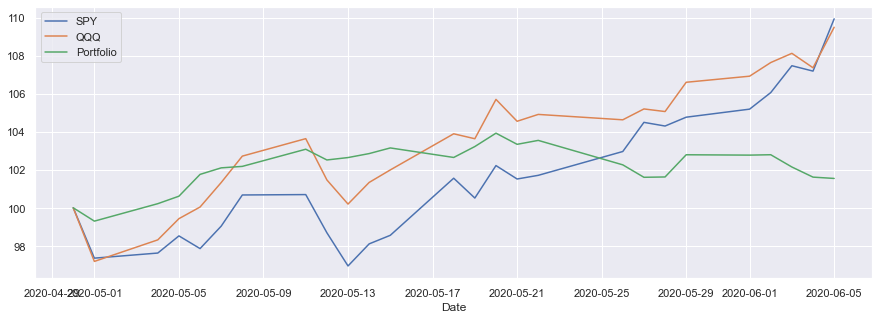

In [7]:
ana.graph({'SPY': -0.8, 'QQQ': 1.0})

In [ ]:
##############################

In [ ]:
from pandas import DataFrame
from wallet.util.analysis import _optimize, _moving_average_statistics
portfolio = {'MSFT': .25, 'AAPL': .25, 'AMZN': .2, 'GOOG': .2, 'FB': .1}
ana = Analysis(['SPY',*portfolio], 63, 5)
ana.graph()

In [ ]:
ana.setup_mask(['SPY', *portfolio])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['FAAMG'] = sum(data[st] * sh for st, sh in portfolio.items())
for col in portfolio.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, False, True))
_moving_average_statistics(frame, 5, .008)

In [ ]:
ana.graph({'SPY': -.75, **portfolio}, drop_components=list(portfolio))